<a href="https://colab.research.google.com/github/WinnieSue/Hotel-rerservation-prediction/blob/main/Hotel_reservation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Source of data : Kaggle (https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset) 

2) Brief description of data: Hotels receive multiple bookings froma a variety of clients. The information that the hotels collect from the client can assist to predict of a client will confirm booking or cancel.


3) What is the target? The target is booking status

4) Is this a classification or regression problem? It is a classification problem.

5) How many features? 19

6) How many rows of data. 36275

7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?

- the dataset is a bit unbalanced and tehrefore that is one problem that has to be dealt with.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/Hotel Reservations.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [3]:
df.shape

(36275, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [5]:
# check the class balance
df['booking_status'].value_counts(normalize = True)

Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64

In [6]:
# find duplicated rows. there is none
df.duplicated().sum()

0

In [7]:
# Checking for any issues in categorical data
df['type_of_meal_plan'].value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

In [8]:
df['room_type_reserved'].value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

In [9]:
df['market_segment_type'].value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

**produce univariate visuals for the target and all features**

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


<ipython-input-11-0d89bcc8c841>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'booking_status', y = 'no_of_children', data = df, ci = None);


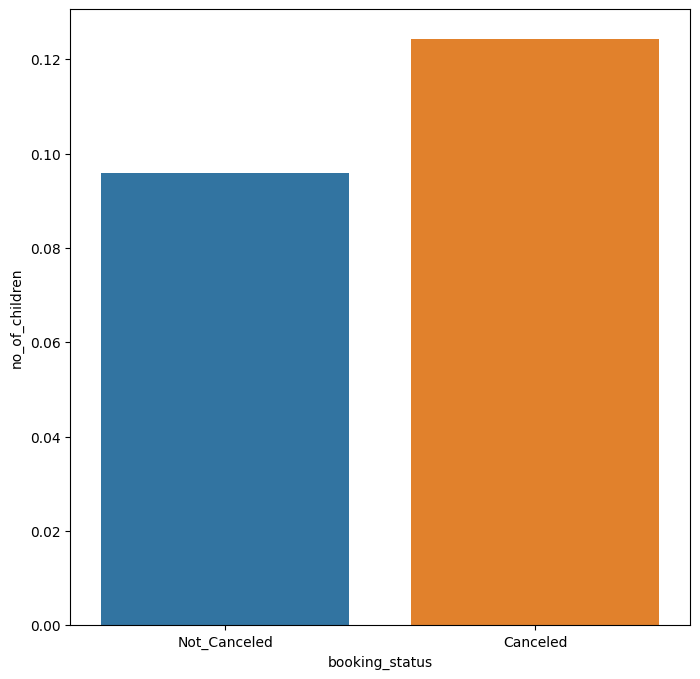

In [11]:
# Checking the booking status based on the number of chidren
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(x = 'booking_status', y = 'no_of_children', data = df, ci = None);

<ipython-input-12-a9f27b8281b1>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'booking_status', y = 'no_of_adults', data = df, ci = None, hue = 'market_segment_type');


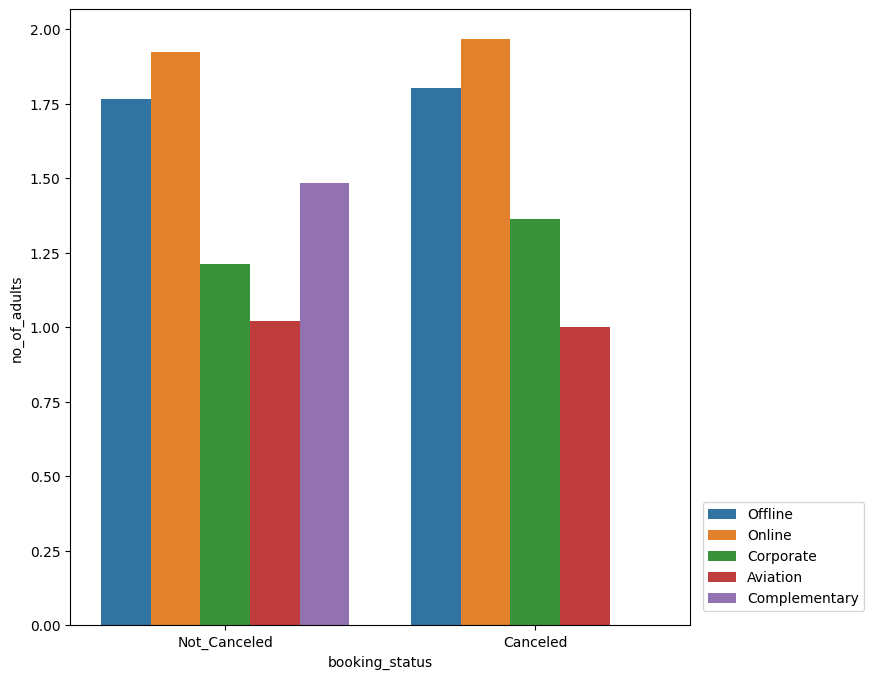

In [12]:
# Seeing the booking status based on market segment type of the person booking and number of adults
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(x = 'booking_status', y = 'no_of_adults', data = df, ci = None, hue = 'market_segment_type');
plt.legend(bbox_to_anchor=(1.02, 0.20), loc='upper left', borderaxespad=0)

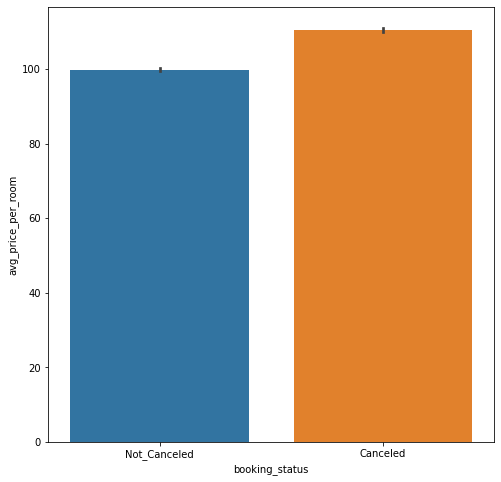

In [ ]:
# booking status based on the avg price of the room
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(x = 'booking_status', y = 'avg_price_per_room', data = df);

We can see here that for rooms above $100, there was mostly cancellations.

<ipython-input-47-ede3a5694ff9>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'booking_status', y = 'avg_price_per_room', data = df, ci = None, hue = 'room_type_reserved');


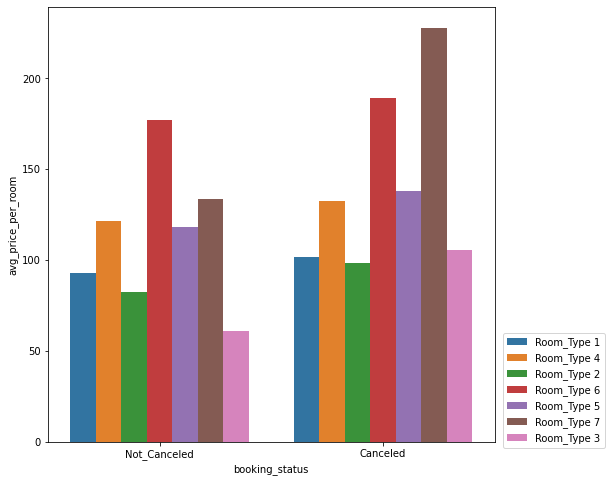

In [ ]:
# booking status based on the avg price of the room while looking at the room type reserved
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(x = 'booking_status', y = 'avg_price_per_room', data = df, ci = None, hue = 'room_type_reserved');
plt.legend(bbox_to_anchor=(1.02, 0.25), loc='upper left', borderaxespad=0)

room type 6 is almost unaffected by the price. room type 7, most canceled as long as it was above about $130 averagely

It goes without saying that the price of the room has a high effect on whether a room will be booked or not.

<ipython-input-36-e35acec4e2f9>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'booking_status', y = 'avg_price_per_room', data = df, ci = None, hue = 'type_of_meal_plan');


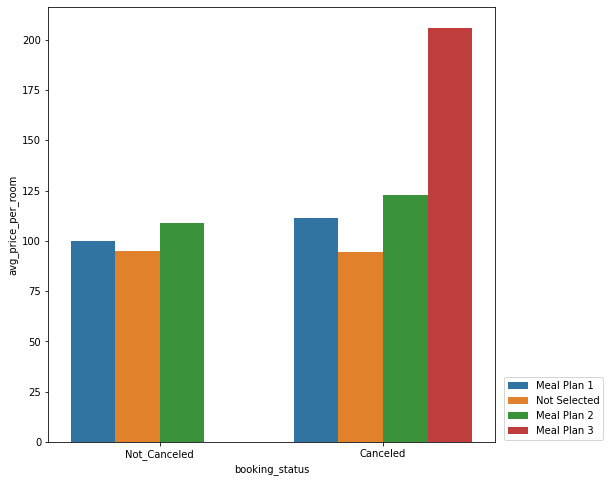

In [ ]:
# Looking at the booking status with the price og the room and the meal plan.
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(x = 'booking_status', y = 'avg_price_per_room', data = df, ci = None, hue = 'type_of_meal_plan');
plt.legend(bbox_to_anchor=(1.02, 0.15), loc='upper left', borderaxespad=0)

Everyone who signed up for mealplan 3 cancelled their booking. this can mean that if someone calls and wants meal plan 3, they are most likely not going to book.

In [16]:
df['booking_status'] = df['booking_status'].replace({'Not_Canceled': 0, 'Canceled':1})
df['booking_status'].value_counts()

0    24390
1    11885
Name: booking_status, dtype: int64

<Axes: >

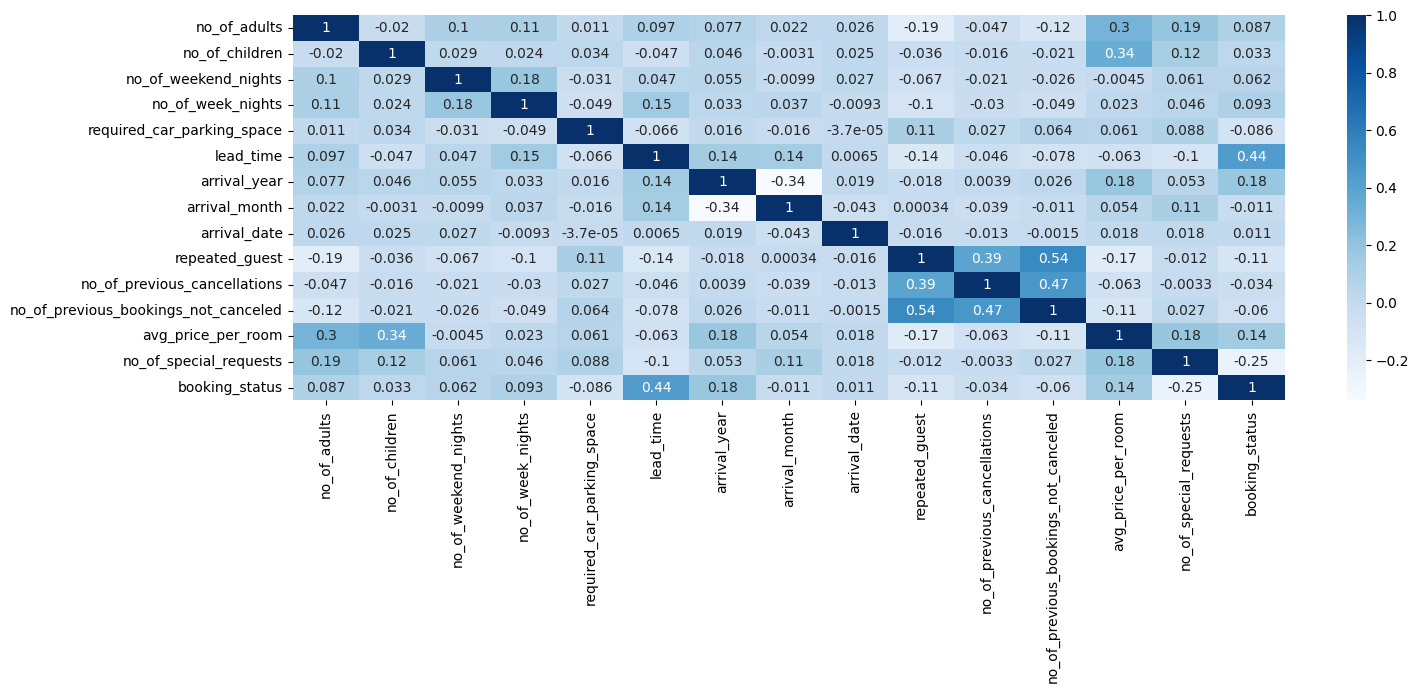

In [17]:
# Plotting a heatmap to see the correlation
plt.figure(figsize = (16,5))
sns.heatmap((df.corr()), cmap = 'Blues', annot = True)

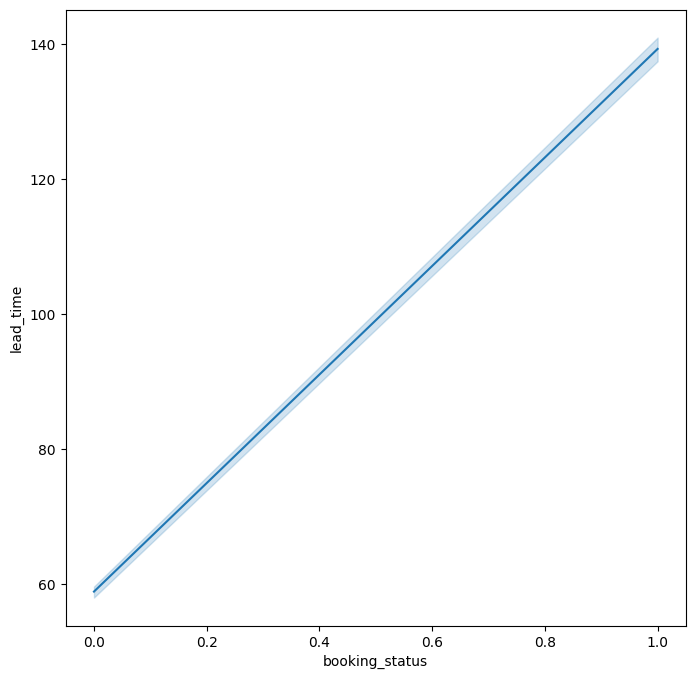

In [19]:
fig, ax = plt.subplots(figsize=(8,8))
sns.lineplot(x = 'booking_status', y = 'lead_time', data = df);

It is clear that as the lead time increases, the chances of cancellation are high. lead time being the time between making a reservation and actually  checking in

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(x = 'booking_status', y = 'avg_price_per_room', data = df, ci = None, hue = 'type_of_meal_plan');
plt.legend(bbox_to_anchor=(1.02, 0.15), loc='upper left', borderaxespad=0)